# Data Cleaning

This section focuses on cleaning and preprocessing the raw job listings dataset obtained from web scraping.  
The objective is to make the data structured, consistent, and suitable for further analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

The scraped dataset is loaded into a pandas DataFrame for inspection and preprocessing.

In [2]:
df=pd.read_csv("data/raw/remoteok_raw.csv")

## Initial Data Inspection

An initial inspection of the dataset is performed to understand its structure, column names, size, and the presence of missing values.

In [3]:
df.head(10)

,Search Role,Job Title,Company Name,Technical Skills,Job Attributes,Location,Date Posted,Job URL
0,Support,DeFi Analyst and Educator,Decentralized Masters,"Edu, Teaching, Crypto",NaN,?? Worldwide,2025-08-22T13:22:49+00:00,https://remoteok.com/remote-jobs/remote-defi-a...
1,Engineer,Full Stack Product Engineer,Jiga,"Senior, JavaScript, React, Node, Mongo, Full S...",NaN,???? United States,2026-01-04T09:11:39+00:00,https://remoteok.com/remote-jobs/remote-full-s...
2,Engineer,Lead Omics Workflow Engineer,Axle,"Software, Assistant, Lead, Health, Healthcare,...",NaN,?? Upgrade to Premium to see salary,2026-01-06T00:02:28+00:00,https://remoteok.com/remote-jobs/remote-lead-o...
3,Engineer,Copy of Senior AI ML Engineer Applied Machine ...,Trase Systems,Senior,NaN,USA,2026-01-06T00:02:04+00:00,https://remoteok.com/remote-jobs/remote-copy-o...
4,Engineer,Senior Software Engineer Backend Engineering,Trase Systems,"Software, Senior, Engineering, Backend",NaN,?? Upgrade to Premium to see salary,2026-01-06T00:01:33+00:00,https://remoteok.com/remote-jobs/remote-senior...
5,Engineer,Senior Software Engineer Frontend Engineering,Trase Systems,"Front End, Software, Senior, Engineering",NaN,?? Upgrade to Premium to see salary,2026-01-06T00:00:49+00:00,https://remoteok.com/remote-jobs/remote-senior...
6,Engineer,Software Engineer Agent Infrastructure,OpenAI,"Software, Design, System, Security, Training, ...",NaN,?? Probably worldwide,2026-01-05T22:00:11+00:00,https://remoteok.com/remote-jobs/remote-softwa...
7,Engineer,Software Engineer,Tech Solutions Inc.,"Software, Web",NaN,San Francisco,2026-01-05T20:00:13+00:00,https://remoteok.com/remote-jobs/remote-softwa...
8,Engineer,Senior Backend PHP Software Engineer Inventory,Cloudbeds,"Software, SaaS, Amazon, Web, PHP, Strategy, Se...",NaN,Minnesota,2026-01-05T18:01:20+00:00,https://remoteok.com/remote-jobs/remote-senior...
9,Engineer,Senior Backend PHP Software Engineer Inventory,Cloudbeds,"Software, SaaS, Amazon, Web, PHP, Strategy, Se...",NaN,Michigan,2026-01-05T18:00:53+00:00,https://remoteok.com/remote-jobs/remote-senior...


In [4]:
df.shape

(4398, 8)

In [5]:
df = df.reset_index(drop=True)

In [6]:
df.columns=(df.columns.str.lower().str.strip().str.replace(" ","_"))

In [7]:
df.head(2)

,search_role,job_title,company_name,technical_skills,job_attributes,location,date_posted,job_url
0,Support,DeFi Analyst and Educator,Decentralized Masters,"Edu, Teaching, Crypto",NaN,?? Worldwide,2025-08-22T13:22:49+00:00,https://remoteok.com/remote-jobs/remote-defi-a...
1,Engineer,Full Stack Product Engineer,Jiga,"Senior, JavaScript, React, Node, Mongo, Full S...",NaN,???? United States,2026-01-04T09:11:39+00:00,https://remoteok.com/remote-jobs/remote-full-s...


In [8]:
df['job_attributes'].isnull().sum()

4063

In [9]:
df = df.drop(columns=["job_attributes"])

## Handling Missing Values

Missing or null values are identified and handled appropriately to maintain data consistency and avoid issues during analysis.

In [10]:
df['technical_skills'].isnull().sum()

72

In [11]:
# df["job_attributes"]=df['job_attributes'].fillna("Not Specified")
df["technical_skills"]=df['technical_skills'].fillna("unknown")

In [12]:
df['technical_skills'].values

array(['Edu, Teaching, Crypto',
       'Senior, JavaScript, React, Node, Mongo, Full Stack',
       'Software, Assistant, Lead, Health, Healthcare, Educational', ...,
       'Security, Cloud, Engineer, Engineering, Backend',
       'Senior, Engineer, Backend',
       'Senior, Operations, Reliability, Engineer'], dtype=object)

In [13]:
df.head(2)

,search_role,job_title,company_name,technical_skills,location,date_posted,job_url
0,Support,DeFi Analyst and Educator,Decentralized Masters,"Edu, Teaching, Crypto",?? Worldwide,2025-08-22T13:22:49+00:00,https://remoteok.com/remote-jobs/remote-defi-a...
1,Engineer,Full Stack Product Engineer,Jiga,"Senior, JavaScript, React, Node, Mongo, Full S...",???? United States,2026-01-04T09:11:39+00:00,https://remoteok.com/remote-jobs/remote-full-s...


In [14]:
df['location']

0                              ?? Worldwide
1                        ???? United States
2       ?? Upgrade to Premium to see salary
3                                       USA
4       ?? Upgrade to Premium to see salary
                       ...                 
4393                  ?? Probably worldwide
4394                  ?? Probably worldwide
4395                  ?? Probably worldwide
4396                  ?? Probably worldwide
4397                  ?? Probably worldwide
Name: location, Length: 4398, dtype: object

## Removing Duplicate Records

Duplicate job listings are removed to ensure that each record represents a unique job posting and to prevent bias in analysis.

In [15]:
# location cleaning
def clean_loc(x):
    if pd.isna(x):
        return "unknown"
    x=x.replace("?","").strip()
    if x=="":
        return "unknown"
    return x

In [16]:
df['location']=df['location'].apply(clean_loc)

In [17]:
df["location"].unique()

array(['Worldwide', 'United States', 'Upgrade to Premium to see salary',
       'USA', 'Probably worldwide', 'San Francisco', 'Minnesota',
       'Michigan', 'Massachusetts', 'US/Canada', 'India', 'France',
       'New York City', 'Remote, U.S.', 'Palo Alto', 'San Jose',
       'Remote - United States', 'U.S. Remote', 'Hyderabad',
       'Remote - US', 'Remote EMEA, Remote Asia',
       'Remote - North America', 'Mountain View', 'Amman', 'Seattle, WA',
       'Dhaka', 'Bucharest', 'Alpharetta', 'Remote - EMEA', 'Noida',
       'Carson City', 'Golden, CO or San Francisco', 'Remote: Spain',
       'Poland', 'Europe', 'Remote, Canada', 'Lisbon', 'Remote, US',
       'Remote, USA', 'Remote – Europe or East Coast North America',
       'Remote Mexico City', 'Brooklyn, NY', 'US, CA, Remote',
       'Remote - Asia', 'Philippines', 'Remote  - CST Timezone',
       'Europe & Asia', 'Banja Luka, Bosnia or Belgrade, Serbia',
       'Globally Remote', 'Broomfield, Colorado, United States',
       

## Column Name Standardization

Column names are standardized by converting them to lowercase and removing extra spaces to ensure consistency and ease of access during analysis.

In [18]:
# as location column is very noisy so creating different coloumns location typ and region wise for better understanding

In [19]:
df["location_raw"]=df["location"]
df['location']=df['location'].str.lower().str.strip()

In [20]:
def loc_type(x):
    if pd.isna(x):
        return "unknown"
    if "remote" in x or "work from home" in x:
        return "Remote"
    if any(i in x for i in ["world", "global", "anywhere"]):
        return "Remote"
    if x in ["any", "all", "not specified", "multiple locations", "part time"]:
        return "Unknown"

    return "Onsite"

## Cleaning Location Data

Location-related fields are cleaned and standardized to support meaningful grouping and comparison during location-based analysis.

In [21]:
df['location_type']=df['location'].apply(loc_type)

In [22]:
df.head(2)

,search_role,job_title,company_name,technical_skills,location,date_posted,job_url,location_raw,location_type
0,Support,DeFi Analyst and Educator,Decentralized Masters,"Edu, Teaching, Crypto",worldwide,2025-08-22T13:22:49+00:00,https://remoteok.com/remote-jobs/remote-defi-a...,Worldwide,Remote
1,Engineer,Full Stack Product Engineer,Jiga,"Senior, JavaScript, React, Node, Mongo, Full S...",united states,2026-01-04T09:11:39+00:00,https://remoteok.com/remote-jobs/remote-full-s...,United States,Onsite


In [23]:
df["location_type"].value_counts()

location_type
Onsite     2771
Remote     1594
Unknown      33
Name: count, dtype: int64

In [24]:
# creating region wise here
def loc_region(x):
    if pd.isna(x):
        return "unknow"
    if any(i in x for i in ["world",'global','anywhere']):
        return "WorldWide"
    if any(i in x for i in ['united states','usa','u.s.',"us ", "us-", "america"]):
        return "USA"

    if any(i in x for i in ["canada", "toronto", "ontario"]):
        return "Canada"

    if any(i in x for i in ["europe", "uk", "london", "germany", "france", "spain", "italy", "poland", "romania", "eu"]):
        return "Europe"

    if any(i in x for i in ["india", "bangalore", "bengaluru", "delhi", "pune", "mumbai", "chennai", "hyderabad"]):
        return "India"

    if any(i in x for i in ["asia", "singapore", "philippines", "china", "taiwan", "korea", "japan", "malaysia"]):
        return "Asia"

    if any(i in x for i in ["latin", "latam", "brazil", "argentina", "colombia", "mexico"]):
        return "LATAM"

    if any(i in x for i in ["africa", "nigeria", "kenya", "tanzania"]):
        return "Africa"

    return "Other"

In [25]:
df['loc_region']=df["location"].apply(loc_region)

In [26]:
df['loc_region'].value_counts()

loc_region
Other        2182
WorldWide     942
USA           715
Europe        149
India         120
LATAM         104
Canada         94
Asia           85
Africa          7
Name: count, dtype: int64

In [27]:
df.head(3)

,search_role,job_title,company_name,technical_skills,location,date_posted,job_url,location_raw,location_type,loc_region
0,Support,DeFi Analyst and Educator,Decentralized Masters,"Edu, Teaching, Crypto",worldwide,2025-08-22T13:22:49+00:00,https://remoteok.com/remote-jobs/remote-defi-a...,Worldwide,Remote,WorldWide
1,Engineer,Full Stack Product Engineer,Jiga,"Senior, JavaScript, React, Node, Mongo, Full S...",united states,2026-01-04T09:11:39+00:00,https://remoteok.com/remote-jobs/remote-full-s...,United States,Onsite,USA
2,Engineer,Lead Omics Workflow Engineer,Axle,"Software, Assistant, Lead, Health, Healthcare,...",upgrade to premium to see salary,2026-01-06T00:02:28+00:00,https://remoteok.com/remote-jobs/remote-lead-o...,Upgrade to Premium to see salary,Onsite,Other


In [28]:
junk_locations = [
    "upgrade to premium",
    "not specified",
    "any",
    "all",
    "multiple locations",
    "part time"
]
def fix_junk_locations(r):
    loc = r["location"]

    if any(junk in loc for junk in junk_locations):
        return pd.Series(["Unknown", "Unknown"])

    return pd.Series([r["location_type"], r["loc_region"]])

df[["location_type", "loc_region"]] = df.apply(
    fix_junk_locations, axis=1
)

In [29]:
# combining others and unknown to others
df['loc_region']=df['loc_region'].replace(["Other","other","unknown","Unknown"],"Others")
df['loc_region'].value_counts()

loc_region
Others       2265
WorldWide     863
USA           715
Europe        145
India         120
LATAM         104
Canada         94
Asia           85
Africa          7
Name: count, dtype: int64

In [30]:
df.head(3)

,search_role,job_title,company_name,technical_skills,location,date_posted,job_url,location_raw,location_type,loc_region
0,Support,DeFi Analyst and Educator,Decentralized Masters,"Edu, Teaching, Crypto",worldwide,2025-08-22T13:22:49+00:00,https://remoteok.com/remote-jobs/remote-defi-a...,Worldwide,Remote,WorldWide
1,Engineer,Full Stack Product Engineer,Jiga,"Senior, JavaScript, React, Node, Mongo, Full S...",united states,2026-01-04T09:11:39+00:00,https://remoteok.com/remote-jobs/remote-full-s...,United States,Onsite,USA
2,Engineer,Lead Omics Workflow Engineer,Axle,"Software, Assistant, Lead, Health, Healthcare,...",upgrade to premium to see salary,2026-01-06T00:02:28+00:00,https://remoteok.com/remote-jobs/remote-lead-o...,Upgrade to Premium to see salary,Unknown,Others


In [31]:
# converting and normalizing date coloumns

In [32]:
df['date_posted']=pd.to_datetime(df['date_posted'],utc=True,errors='coerce')

In [33]:
df['date_posted']=df['date_posted'].dt.tz_localize(None)

In [34]:
df.head(2)

,search_role,job_title,company_name,technical_skills,location,date_posted,job_url,location_raw,location_type,loc_region
0,Support,DeFi Analyst and Educator,Decentralized Masters,"Edu, Teaching, Crypto",worldwide,2025-08-22 13:22:49,https://remoteok.com/remote-jobs/remote-defi-a...,Worldwide,Remote,WorldWide
1,Engineer,Full Stack Product Engineer,Jiga,"Senior, JavaScript, React, Node, Mongo, Full S...",united states,2026-01-04 09:11:39,https://remoteok.com/remote-jobs/remote-full-s...,United States,Onsite,USA


In [35]:
# seprating date and time

In [36]:
df['post_time']=df['date_posted'].dt.time
df['post_date']=df['date_posted'].dt.date

In [37]:
df.head(3)

,search_role,job_title,company_name,technical_skills,location,date_posted,job_url,location_raw,location_type,loc_region,post_time,post_date
0,Support,DeFi Analyst and Educator,Decentralized Masters,"Edu, Teaching, Crypto",worldwide,2025-08-22 13:22:49,https://remoteok.com/remote-jobs/remote-defi-a...,Worldwide,Remote,WorldWide,13:22:49,2025-08-22
1,Engineer,Full Stack Product Engineer,Jiga,"Senior, JavaScript, React, Node, Mongo, Full S...",united states,2026-01-04 09:11:39,https://remoteok.com/remote-jobs/remote-full-s...,United States,Onsite,USA,09:11:39,2026-01-04
2,Engineer,Lead Omics Workflow Engineer,Axle,"Software, Assistant, Lead, Health, Healthcare,...",upgrade to premium to see salary,2026-01-06 00:02:28,https://remoteok.com/remote-jobs/remote-lead-o...,Upgrade to Premium to see salary,Unknown,Others,00:02:28,2026-01-06


In [38]:
# cleaning job section

In [39]:
df["job_title"].nunique()

916

In [40]:
df["job_title"].value_counts().head(50)

job_title
Software Engineer                                   85
Senior Software Engineer                            49
Senior Data Engineer                                40
Senior DevOps Engineer                              37
Data Engineer                                       34
Account Executive                                   32
Current openings                                    27
Product Manager                                     23
DevOps Engineer                                     22
Staff Software Engineer                             20
Enterprise Account Executive                        19
Customer Success Manager                            18
Sales Development Representative                    17
Senior Product Manager                              17
Sales Engineer                                      15
Senior Backend PHP Software Engineer Inventory      15
Growth Marketing Manager                            15
The SafetyWing Digital Nomad Residency              14


In [41]:
invalid_titles = [
    "current openings",
    "openings",
    "careers",
    "jobs",
    "the safetywing digital nomad residency"
]

df["job_title_clean"] = df["job_title"].str.lower().str.strip()

df["is_valid_job_title"] = ~df["job_title_clean"].isin(invalid_titles)

In [42]:
df["is_valid_job_title"].value_counts()

is_valid_job_title
True     4355
False      43
Name: count, dtype: int64

In [43]:
df = df[df["is_valid_job_title"]].copy()

In [44]:
df.drop(columns=["is_valid_job_title"], inplace=True)

In [45]:
df["job_title"].value_counts().head(15)

job_title
Software Engineer                                 85
Senior Software Engineer                          49
Senior Data Engineer                              40
Senior DevOps Engineer                            37
Data Engineer                                     34
Account Executive                                 32
Product Manager                                   23
DevOps Engineer                                   22
Staff Software Engineer                           20
Enterprise Account Executive                      19
Customer Success Manager                          18
Senior Product Manager                            17
Sales Development Representative                  17
Senior Backend PHP Software Engineer Inventory    15
Growth Marketing Manager                          15
Name: count, dtype: int64

In [46]:
def map_role_bucket(title):
    t = title.lower()

    if "engineer" in t or "developer" in t:
        return "Engineering"
    if "data" in t:
        return "Data"
    if "product" in t:
        return "Product"
    if any(x in t for x in ["sales", "account executive", "business development"]):
        return "Sales"
    if any(x in t for x in ["marketing", "growth"]):
        return "Marketing"
    if any(x in t for x in ["designer", "design", "art"]):
        return "Design"
    if any(x in t for x in ["manager", "director", "head", "vice president"]):
        return "Management"
    if any(x in t for x in ["writer", "documentation"]):
        return "Writing"

    return "Other"

df["role_bucket"] = df["job_title"].apply(map_role_bucket)

In [47]:
df["role_bucket"].value_counts()

role_bucket
Engineering    1665
Other           922
Management      577
Sales           394
Marketing       238
Product         224
Design          175
Data             82
Writing          78
Name: count, dtype: int64

In [48]:
def extract_seniority(title):
    t = title.lower()

    if any(x in t for x in ["intern", "trainee", "junior", "jr"]):
        return "Junior"
    if any(x in t for x in ["senior", "sr"]):
        return "Senior"
    if any(x in t for x in ["staff", "principal", "lead"]):
        return "Staff/Lead"
    if any(x in t for x in ["head", "director", "vice president", "managing director"]):
        return "Executive"

    return "Mid"

df["seniority"] = df["job_title"].apply(extract_seniority)

In [49]:
df["seniority"].value_counts()

seniority
Mid           2629
Senior        1053
Staff/Lead     304
Executive      273
Junior          96
Name: count, dtype: int64

In [50]:
df.head(5)

,search_role,job_title,company_name,technical_skills,location,date_posted,job_url,location_raw,location_type,loc_region,post_time,post_date,job_title_clean,role_bucket,seniority
0,Support,DeFi Analyst and Educator,Decentralized Masters,"Edu, Teaching, Crypto",worldwide,2025-08-22 13:22:49,https://remoteok.com/remote-jobs/remote-defi-a...,Worldwide,Remote,WorldWide,13:22:49,2025-08-22,defi analyst and educator,Other,Mid
1,Engineer,Full Stack Product Engineer,Jiga,"Senior, JavaScript, React, Node, Mongo, Full S...",united states,2026-01-04 09:11:39,https://remoteok.com/remote-jobs/remote-full-s...,United States,Onsite,USA,09:11:39,2026-01-04,full stack product engineer,Engineering,Mid
2,Engineer,Lead Omics Workflow Engineer,Axle,"Software, Assistant, Lead, Health, Healthcare,...",upgrade to premium to see salary,2026-01-06 00:02:28,https://remoteok.com/remote-jobs/remote-lead-o...,Upgrade to Premium to see salary,Unknown,Others,00:02:28,2026-01-06,lead omics workflow engineer,Engineering,Staff/Lead
3,Engineer,Copy of Senior AI ML Engineer Applied Machine ...,Trase Systems,Senior,usa,2026-01-06 00:02:04,https://remoteok.com/remote-jobs/remote-copy-o...,USA,Onsite,USA,00:02:04,2026-01-06,copy of senior ai ml engineer applied machine ...,Engineering,Senior
4,Engineer,Senior Software Engineer Backend Engineering,Trase Systems,"Software, Senior, Engineering, Backend",upgrade to premium to see salary,2026-01-06 00:01:33,https://remoteok.com/remote-jobs/remote-senior...,Upgrade to Premium to see salary,Unknown,Others,00:01:33,2026-01-06,senior software engineer backend engineering,Engineering,Senior


In [51]:
df.duplicated(
    subset=["job_title_clean", "company_name", "job_url"]
).sum()

3263

In [52]:
dupes = df[df.duplicated(
    subset=["job_title_clean", "company_name", "job_url"],
    keep=False
)]

dupes[["job_title", "company_name", "job_url", "post_date"]].head(10)

,job_title,company_name,job_url,post_date
0,DeFi Analyst and Educator,Decentralized Masters,https://remoteok.com/remote-jobs/remote-defi-a...,2025-08-22
1,Full Stack Product Engineer,Jiga,https://remoteok.com/remote-jobs/remote-full-s...,2026-01-04
2,Lead Omics Workflow Engineer,Axle,https://remoteok.com/remote-jobs/remote-lead-o...,2026-01-06
3,Copy of Senior AI ML Engineer Applied Machine ...,Trase Systems,https://remoteok.com/remote-jobs/remote-copy-o...,2026-01-06
4,Senior Software Engineer Backend Engineering,Trase Systems,https://remoteok.com/remote-jobs/remote-senior...,2026-01-06
5,Senior Software Engineer Frontend Engineering,Trase Systems,https://remoteok.com/remote-jobs/remote-senior...,2026-01-06
6,Software Engineer Agent Infrastructure,OpenAI,https://remoteok.com/remote-jobs/remote-softwa...,2026-01-05
7,Software Engineer,Tech Solutions Inc.,https://remoteok.com/remote-jobs/remote-softwa...,2026-01-05
8,Senior Backend PHP Software Engineer Inventory,Cloudbeds,https://remoteok.com/remote-jobs/remote-senior...,2026-01-05
9,Senior Backend PHP Software Engineer Inventory,Cloudbeds,https://remoteok.com/remote-jobs/remote-senior...,2026-01-05


In [53]:
df = df.drop_duplicates(
    subset=["job_title_clean", "company_name", "job_url"],
    keep="first"
)

In [54]:
df.duplicated(
    subset=["job_title_clean", "company_name", "job_url"]
).sum()

0

In [55]:
print("After:", len(df))

After: 1092


In [56]:
df.groupby(["company_name", "job_title_clean"]).size().sort_values(ascending=False).head(15)

company_name            job_title_clean                                                      
Tech Innovations Inc.   software engineer                                                        13
Tech Solutions Inc.     software engineer                                                         5
Cloudbeds               senior backend php software engineer inventory                            3
Datavant                job                                                                       3
InfStones               growth marketing manager                                                  3
Salt Security           api security engineer                                                     2
CompassX Group          full stack software engineer                                              2
Mark43                  data migration engineer                                                   2
ALX Africa              program delivery intern                                                   2
Market

In [57]:

df["job_title_clean"] = (
    df["job_title"]
    .str.lower()
    .str.replace(r"\(.*?\)", "", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)
# noisy title
bad_title_patterns = [
    r"^job$",
    r"careers",
    r"all openings",
    r"jobs ",
    r"current openings",
    r"openings",
    r"work .* relocation",
]

# making mask for bad titles
mask = df["job_title_clean"].str.contains(
    "|".join(bad_title_patterns),
    regex=True,
    na=False
)


 # Removing bad titles
df = df[~mask].copy()
df.reset_index(drop=True, inplace=True)

print("Cleaning complete.")
print("Remaining rows:", len(df))

Cleaning complete.
Remaining rows: 1078


In [58]:
df["job_title"].value_counts().head(20)

job_title
Software Engineer                   27
Senior Software Engineer            12
Senior Data Engineer                 9
Account Executive                    8
Data Engineer                        8
Product Manager                      6
Senior DevOps Engineer               6
Senior Product Manager               5
Enterprise Account Executive         5
Customer Success Manager             5
DevOps Engineer                      5
Staff Software Engineer              5
Backend Engineer                     4
Product Designer                     4
Business Development Manager         4
Sales Development Representative     4
Senior Data Analyst                  3
Account Manager                      3
Project Manager                      3
Senior Product Designer              3
Name: count, dtype: int64

In [59]:
df.shape

(1078, 15)

In [60]:
df.head(5)

,search_role,job_title,company_name,technical_skills,location,date_posted,job_url,location_raw,location_type,loc_region,post_time,post_date,job_title_clean,role_bucket,seniority
0,Support,DeFi Analyst and Educator,Decentralized Masters,"Edu, Teaching, Crypto",worldwide,2025-08-22 13:22:49,https://remoteok.com/remote-jobs/remote-defi-a...,Worldwide,Remote,WorldWide,13:22:49,2025-08-22,defi analyst and educator,Other,Mid
1,Engineer,Full Stack Product Engineer,Jiga,"Senior, JavaScript, React, Node, Mongo, Full S...",united states,2026-01-04 09:11:39,https://remoteok.com/remote-jobs/remote-full-s...,United States,Onsite,USA,09:11:39,2026-01-04,full stack product engineer,Engineering,Mid
2,Engineer,Lead Omics Workflow Engineer,Axle,"Software, Assistant, Lead, Health, Healthcare,...",upgrade to premium to see salary,2026-01-06 00:02:28,https://remoteok.com/remote-jobs/remote-lead-o...,Upgrade to Premium to see salary,Unknown,Others,00:02:28,2026-01-06,lead omics workflow engineer,Engineering,Staff/Lead
3,Engineer,Copy of Senior AI ML Engineer Applied Machine ...,Trase Systems,Senior,usa,2026-01-06 00:02:04,https://remoteok.com/remote-jobs/remote-copy-o...,USA,Onsite,USA,00:02:04,2026-01-06,copy of senior ai ml engineer applied machine ...,Engineering,Senior
4,Engineer,Senior Software Engineer Backend Engineering,Trase Systems,"Software, Senior, Engineering, Backend",upgrade to premium to see salary,2026-01-06 00:01:33,https://remoteok.com/remote-jobs/remote-senior...,Upgrade to Premium to see salary,Unknown,Others,00:01:33,2026-01-06,senior software engineer backend engineering,Engineering,Senior


In [61]:
df = df[~df["job_title_clean"].str.startswith("copy of")].copy()
df.reset_index(drop=True, inplace=True)

In [62]:
df.shape

(1077, 15)

In [63]:
# df.to_csv("cleaned_datasets_with_all_clmns.csv", index=False)

In [64]:
df_master=df.copy()

In [65]:
cols_to_drop=[
    'location_raw',
    'location',
    'date_posted'
]

df_clean_cl = df.drop(columns=cols_to_drop)

In [66]:
df_clean_cl.head(3)

,search_role,job_title,company_name,technical_skills,job_url,location_type,loc_region,post_time,post_date,job_title_clean,role_bucket,seniority
0,Support,DeFi Analyst and Educator,Decentralized Masters,"Edu, Teaching, Crypto",https://remoteok.com/remote-jobs/remote-defi-a...,Remote,WorldWide,13:22:49,2025-08-22,defi analyst and educator,Other,Mid
1,Engineer,Full Stack Product Engineer,Jiga,"Senior, JavaScript, React, Node, Mongo, Full S...",https://remoteok.com/remote-jobs/remote-full-s...,Onsite,USA,09:11:39,2026-01-04,full stack product engineer,Engineering,Mid
2,Engineer,Lead Omics Workflow Engineer,Axle,"Software, Assistant, Lead, Health, Healthcare,...",https://remoteok.com/remote-jobs/remote-lead-o...,Unknown,Others,00:02:28,2026-01-06,lead omics workflow engineer,Engineering,Staff/Lead


In [67]:
# rearranging
df_clean_cl = df_clean_cl[
    [
        "search_role",
        "job_title_clean",
        "company_name",
        "role_bucket",
        "seniority",
        "technical_skills",
        "location_type",
        "loc_region",
        "post_date",
        "post_time",
        "job_url"
    ]
]

## Post-Cleaning Validation

After cleaning, the dataset is reviewed again to confirm that all transformations were applied successfully and the data is ready for analysis.

In [68]:
df_clean_cl.head(4)

,search_role,job_title_clean,company_name,role_bucket,seniority,technical_skills,location_type,loc_region,post_date,post_time,job_url
0,Support,defi analyst and educator,Decentralized Masters,Other,Mid,"Edu, Teaching, Crypto",Remote,WorldWide,2025-08-22,13:22:49,https://remoteok.com/remote-jobs/remote-defi-a...
1,Engineer,full stack product engineer,Jiga,Engineering,Mid,"Senior, JavaScript, React, Node, Mongo, Full S...",Onsite,USA,2026-01-04,09:11:39,https://remoteok.com/remote-jobs/remote-full-s...
2,Engineer,lead omics workflow engineer,Axle,Engineering,Staff/Lead,"Software, Assistant, Lead, Health, Healthcare,...",Unknown,Others,2026-01-06,00:02:28,https://remoteok.com/remote-jobs/remote-lead-o...
3,Engineer,senior software engineer backend engineering,Trase Systems,Engineering,Senior,"Software, Senior, Engineering, Backend",Unknown,Others,2026-01-06,00:01:33,https://remoteok.com/remote-jobs/remote-senior...


## Saving the Cleaned Dataset

The cleaned dataset is saved for further analysis and visualization to ensure reproducibility and ease of reuse.

In [69]:
df_clean_cl.to_csv("only_cleaned_columns.csv", index=False)

In [70]:
df_clean_cl['company_name'].value_counts()

company_name
mindsquare AG            15
Tech Innovations Inc.    13
Jobgether                10
InfStones                 9
CI&T                      9
                         ..
Elite Technology          1
Kochava                   1
Tenable, Inc.             1
HighlightTA               1
OpenZeppelin              1
Name: count, Length: 725, dtype: int64

In [71]:
# df_clean_cl['company_name'].unique()

# Data Analysis

This section focuses on analyzing the cleaned job listings dataset to identify key trends related to job roles, technical skills, locations, and seniority levels.

In [72]:
df_clean_cl.head()

,search_role,job_title_clean,company_name,role_bucket,seniority,technical_skills,location_type,loc_region,post_date,post_time,job_url
0,Support,defi analyst and educator,Decentralized Masters,Other,Mid,"Edu, Teaching, Crypto",Remote,WorldWide,2025-08-22,13:22:49,https://remoteok.com/remote-jobs/remote-defi-a...
1,Engineer,full stack product engineer,Jiga,Engineering,Mid,"Senior, JavaScript, React, Node, Mongo, Full S...",Onsite,USA,2026-01-04,09:11:39,https://remoteok.com/remote-jobs/remote-full-s...
2,Engineer,lead omics workflow engineer,Axle,Engineering,Staff/Lead,"Software, Assistant, Lead, Health, Healthcare,...",Unknown,Others,2026-01-06,00:02:28,https://remoteok.com/remote-jobs/remote-lead-o...
3,Engineer,senior software engineer backend engineering,Trase Systems,Engineering,Senior,"Software, Senior, Engineering, Backend",Unknown,Others,2026-01-06,00:01:33,https://remoteok.com/remote-jobs/remote-senior...
4,Engineer,senior software engineer frontend engineering,Trase Systems,Engineering,Senior,"Front End, Software, Senior, Engineering",Unknown,Others,2026-01-06,00:00:49,https://remoteok.com/remote-jobs/remote-senior...


## Dataset Overview

In [73]:
df_clean_cl.shape

(1077, 11)

In [74]:
df_clean_cl.columns

Index(['search_role', 'job_title_clean', 'company_name', 'role_bucket',
       'seniority', 'technical_skills', 'location_type', 'loc_region',
       'post_date', 'post_time', 'job_url'],
      dtype='object')

In [75]:
df_clean_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   search_role       1077 non-null   object
 1   job_title_clean   1077 non-null   object
 2   company_name      1077 non-null   object
 3   role_bucket       1077 non-null   object
 4   seniority         1077 non-null   object
 5   technical_skills  1077 non-null   object
 6   location_type     1077 non-null   object
 7   loc_region        1077 non-null   object
 8   post_date         1077 non-null   object
 9   post_time         1077 non-null   object
 10  job_url           1077 non-null   object
dtypes: object(11)
memory usage: 92.7+ KB




The cleaned dataset is reviewed to understand its structure, columns, and overall size before performing analysis.

## Top Job Roles Analysis

This analysis identifies the most frequently occurring job titles in the dataset.

In [76]:
top_roles=df_clean_cl['job_title_clean'].value_counts().head(10)
top_roles

job_title_clean
software engineer           28
senior software engineer    12
senior data engineer         9
account executive            8
data engineer                8
product manager              6
senior devops engineer       6
customer success manager     5
senior product manager       5
devops engineer              5
Name: count, dtype: int64

**Insight:** Engineering roles dominate the job postings, with software-related positions appearing most frequently.

## In-Demand Technical Skills

Technical skills were split and analyzed to identify the most commonly required skills across all job postings.

In [77]:
df_clean_cl['technical_skills'] = df['technical_skills'].str.split(',')
skills_exploded = df_clean_cl.explode('technical_skills')
skills_exploded['technical_skills'] = skills_exploded['technical_skills'].str.strip()

top_skills = skills_exploded['technical_skills'].value_counts().head(15)
top_skills

technical_skills
Support        418
Software       336
Management     302
Growth         278
Lead           256
Engineering    253
Manager        231
Design         222
Health         215
Technical      192
Financial      189
Security       182
Operations     159
Cloud          152
Operational    146
Name: count, dtype: int64

**Insight:** Software, engineering, and management-related skills appear most frequently across job listings.

## Role Category Distribution

Jobs were grouped into broader role categories to understand high-level hiring trends.

In [78]:
role_description=df_clean_cl['role_bucket'].value_counts()
role_description

role_bucket
Engineering    389
Other          266
Management     142
Sales           91
Product         53
Marketing       49
Design          45
Data            23
Writing         19
Name: count, dtype: int64

**Insight:** Engineering roles form the largest category, followed by management and sales roles.

## Job Location Type Distribution

This section analyzes the distribution of job postings based on location type.

In [79]:
location_type_dist=df_clean_cl['location_type'].value_counts()
location_type_dist

location_type
Onsite     436
Remote     368
Unknown    273
Name: count, dtype: int64

**Insight:** Both remote and onsite job opportunities have significant presence in the dataset.

## Geographic Distribution of Jobs

This analysis highlights the regional distribution of job postings across different locations.

In [80]:
top_regions=df_clean_cl['loc_region'].value_counts().head(10)
top_regions

loc_region
Others       558
WorldWide    206
USA          169
Europe        39
India         33
LATAM         27
Canada        23
Asia          20
Africa         2
Name: count, dtype: int64

**Insight:** Worldwide and U.S.-based roles are the most common, followed by Europe and India.

## Seniority Level Distribution

This section examines job postings based on seniority levels.

In [81]:
seniority_dist=df_clean_cl['seniority'].value_counts()
seniority_dist

seniority
Mid           689
Senior        232
Staff/Lead     73
Executive      53
Junior         30
Name: count, dtype: int64

**Insight:** Mid-level roles dominate the dataset, indicating strong demand for experienced professionals.

In [82]:
df_clean_cl.to_csv("remote_ok_jobs_cleaned_analysis_ready.csv", index=False)

### Copying Cleaned Data

In [83]:
df_viz = df_clean_cl.copy()

In [84]:
df_viz.head()

,search_role,job_title_clean,company_name,role_bucket,seniority,technical_skills,location_type,loc_region,post_date,post_time,job_url
0,Support,defi analyst and educator,Decentralized Masters,Other,Mid,"[Edu, Teaching, Crypto]",Remote,WorldWide,2025-08-22,13:22:49,https://remoteok.com/remote-jobs/remote-defi-a...
1,Engineer,full stack product engineer,Jiga,Engineering,Mid,"[Senior, JavaScript, React, Node, Mongo, ...",Onsite,USA,2026-01-04,09:11:39,https://remoteok.com/remote-jobs/remote-full-s...
2,Engineer,lead omics workflow engineer,Axle,Engineering,Staff/Lead,"[Software, Assistant, Lead, Health, Health...",Unknown,Others,2026-01-06,00:02:28,https://remoteok.com/remote-jobs/remote-lead-o...
3,Engineer,senior software engineer backend engineering,Trase Systems,Engineering,Senior,"[Software, Senior, Engineering, Backend]",Unknown,Others,2026-01-06,00:01:33,https://remoteok.com/remote-jobs/remote-senior...
4,Engineer,senior software engineer frontend engineering,Trase Systems,Engineering,Senior,"[Front End, Software, Senior, Engineering]",Unknown,Others,2026-01-06,00:00:49,https://remoteok.com/remote-jobs/remote-senior...


In [85]:
df_viz["location_type"].value_counts()

location_type
Onsite     436
Remote     368
Unknown    273
Name: count, dtype: int64

# Graph For Location_Type

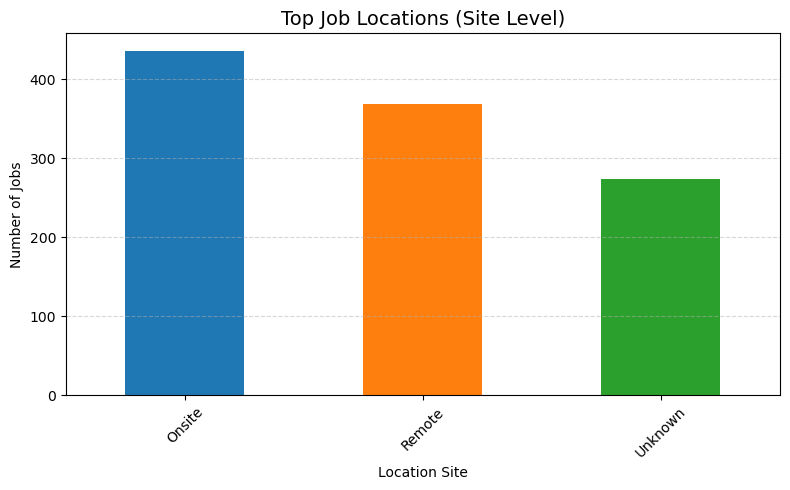

In [86]:
site_counts = df_viz['location_type'].value_counts().head(5)

plt.figure(figsize=(8, 5))
site_counts.plot(
    kind='bar',
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
)

plt.title("Top Job Locations (Site Level)", fontsize=14)
plt.xlabel("Location Site")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()
plt.savefig("jobs_by_location_type.png")
plt.close()

# Loc Region

In [87]:
df_viz['loc_region'].value_counts()

loc_region
Others       558
WorldWide    206
USA          169
Europe        39
India         33
LATAM         27
Canada        23
Asia          20
Africa         2
Name: count, dtype: int64

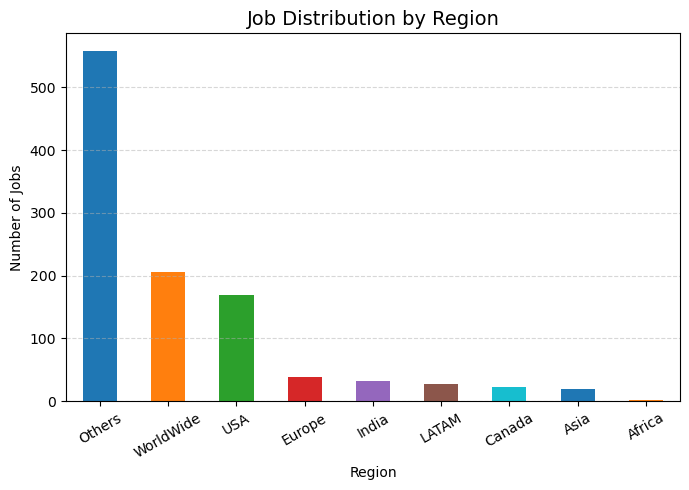

In [88]:
region_counts_all = df_viz['loc_region'].value_counts()
region_counts = region_counts_all[0:]
# region_counts["others"] = region_counts_all[6:].sum()

plt.figure(figsize=(7, 5))
region_counts.plot(
    kind='bar',
    color=[
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#17becf"   # cyan (for Others)
]
)

plt.title("Job Distribution by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()
plt.savefig("jobs_by_location_region.png")
plt.close()

# Job Roles

* Top 10

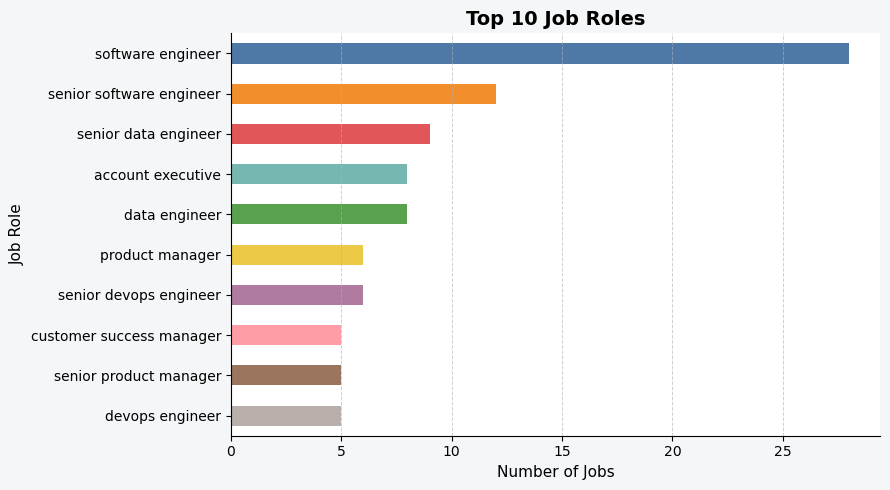

In [89]:
top_roles = df_viz['job_title_clean'].value_counts().head(10)


bar_colors = [
    "#4e79a7", "#f28e2b", "#e15759", "#76b7b2", "#59a14f",
    "#edc948", "#b07aa1", "#ff9da7", "#9c755f", "#bab0ab"
]



fig, ax = plt.subplots(figsize=(9, 5))
fig.patch.set_facecolor('#f4f6f7')   # outer background
ax.set_facecolor('#ffffff')          # plot background




top_roles.plot(
    kind='barh',
    color=bar_colors,
    ax=ax
)



ax.set_title("Top 10 Job Roles", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Jobs", fontsize=11)
ax.set_ylabel("Job Role", fontsize=11)

ax.grid(
    axis='x',
    linestyle='--',
    linewidth=0.7,
    alpha=0.6
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()

plt.tight_layout()
plt.savefig(f"top_10_job_roles.png", dpi=300)
plt.show()
plt.close()

* Top 20

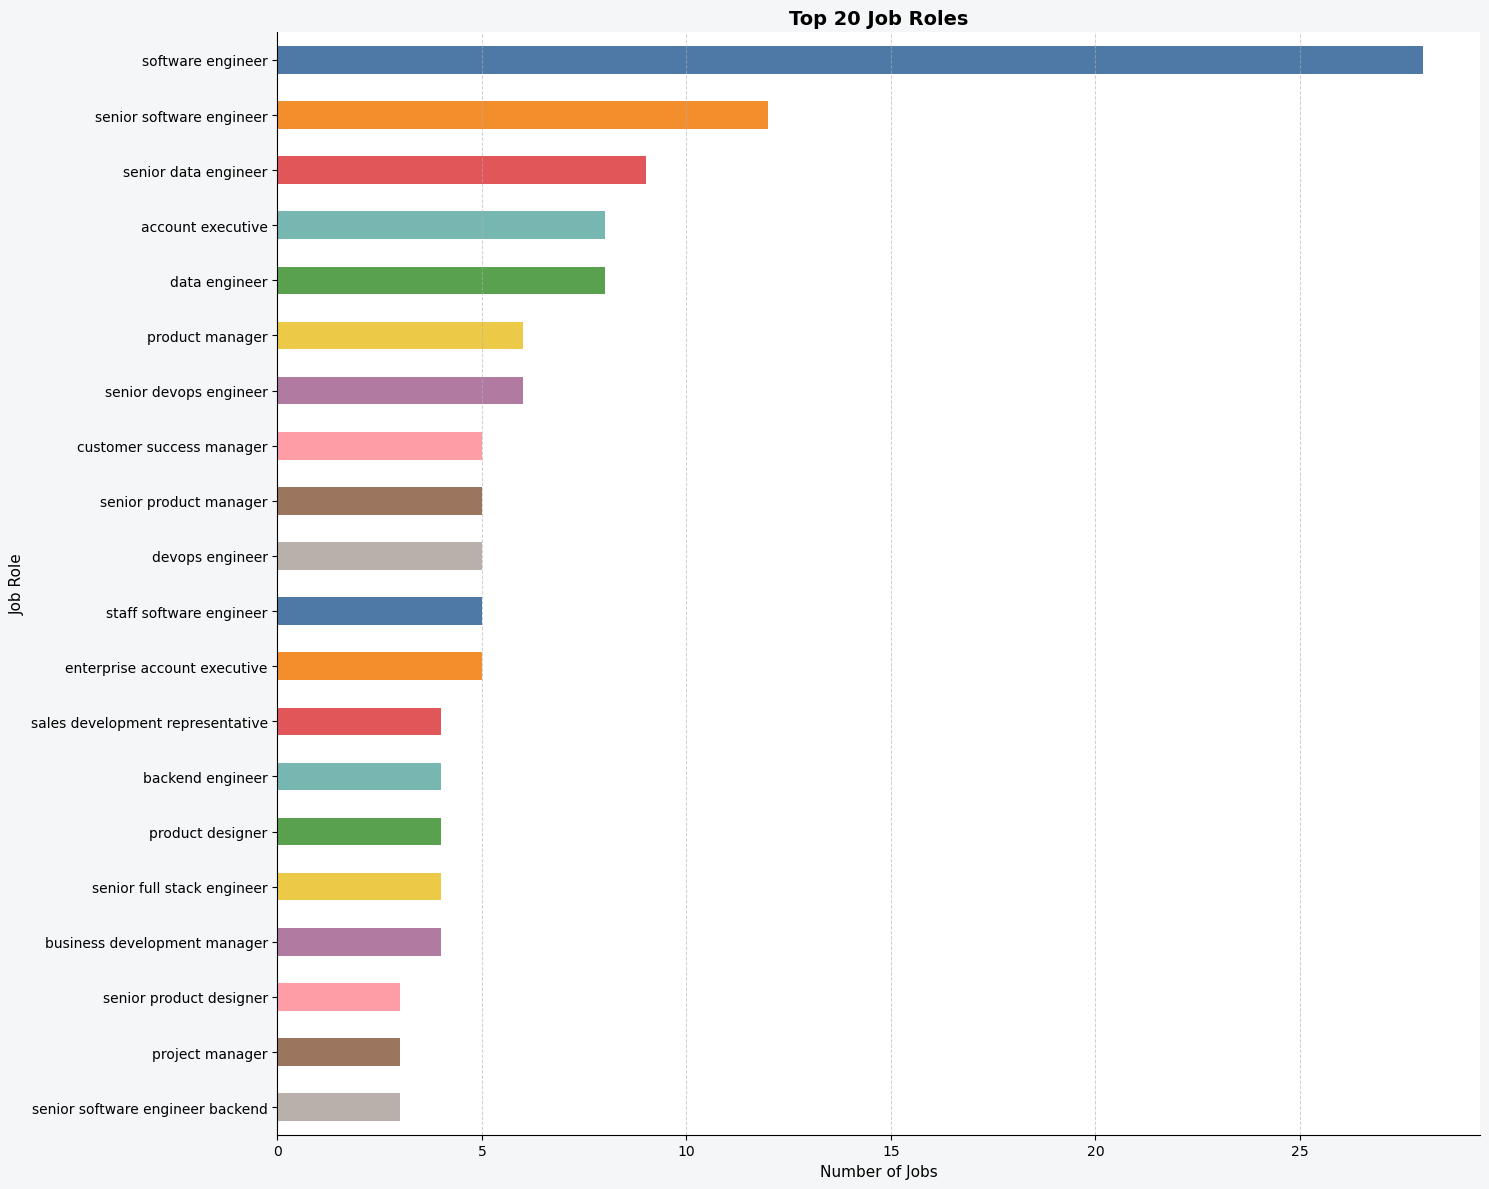

In [90]:
top_roles = df_viz['job_title_clean'].value_counts().head(20)



bar_colors = [
    "#4e79a7", "#f28e2b", "#e15759", "#76b7b2", "#59a14f",
    "#edc948", "#b07aa1", "#ff9da7", "#9c755f", "#bab0ab"
]




fig, ax = plt.subplots(figsize=(15, 12))
fig.patch.set_facecolor('#f4f6f7')   # outer background
ax.set_facecolor('#ffffff')          # plot background



top_roles.plot(
    kind='barh',
    color=bar_colors,
    ax=ax
)




ax.set_title("Top 20 Job Roles", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Jobs", fontsize=11)
ax.set_ylabel("Job Role", fontsize=11)



ax.grid(
    axis='x',
    linestyle='--',
    linewidth=0.7,
    alpha=0.6
)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.invert_yaxis()

plt.tight_layout()
plt.savefig(f"top_20_job_roles.png", dpi=300)
plt.show()
plt.close()

# In Demand Skills
* Top 10

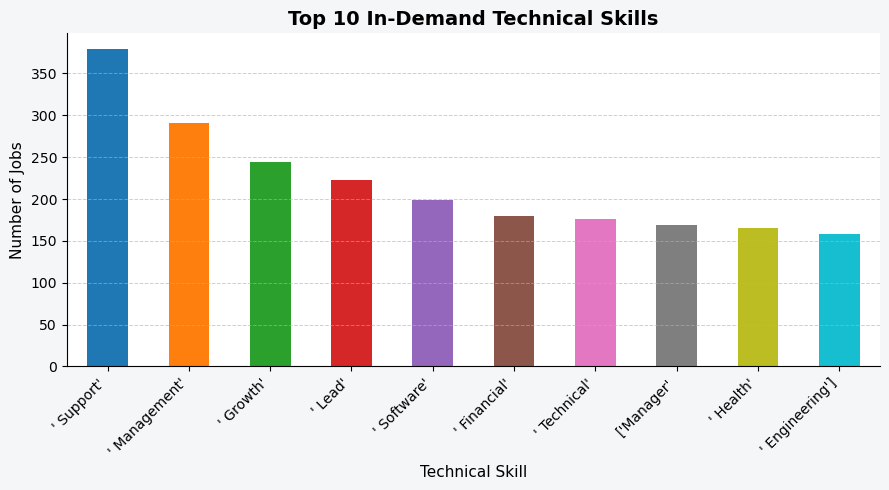

In [91]:
skills_flat = (
    df_viz['technical_skills']
    .astype(str)
    .str.split(',')
    .explode()
    .str.strip()
)

top_skills = skills_flat.value_counts().head(10)
# Bar colors (10 distinct colors)
bar_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
]

# Create figure with background
fig, ax = plt.subplots(figsize=(9, 5))
fig.patch.set_facecolor('#f4f6f7')   # outer background
ax.set_facecolor('#ffffff')          # plot background

# Plot
top_skills.plot(
    kind='bar',
    color=bar_colors,
    ax=ax
)

# Titles and labels
ax.set_title("Top 10 In-Demand Technical Skills", fontsize=14, fontweight='bold')
ax.set_xlabel("Technical Skill", fontsize=11)
ax.set_ylabel("Number of Jobs", fontsize=11)

# X ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Grid styling
ax.grid(
    axis='y',
    linestyle='--',
    linewidth=0.7,
    alpha=0.6
)

# Clean borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(f"top_10_technical_skills.png", dpi=300)
plt.show()
plt.close()

* Top 20

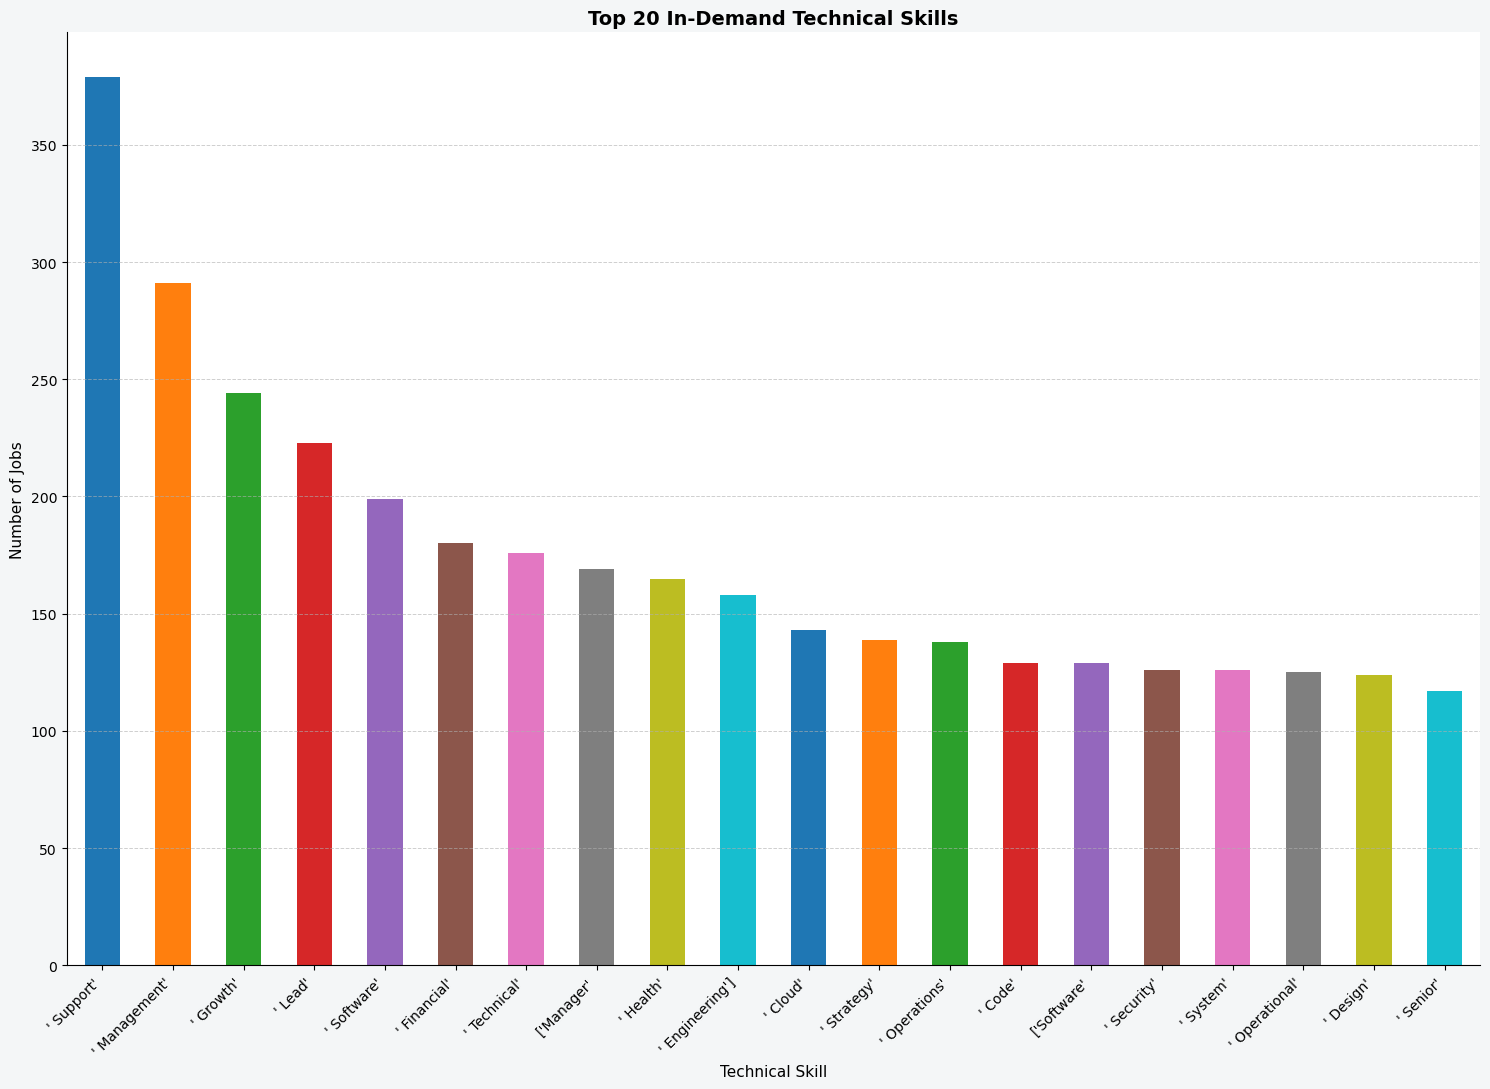

In [92]:
skills_flat = (
    df_viz['technical_skills']
    .astype(str)
    .str.split(',')
    .explode()
    .str.strip()
)

top_skills = skills_flat.value_counts().head(20)

# Bar colors (10 distinct colors)
bar_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
]

# Create figure with background
fig, ax = plt.subplots(figsize=(15, 11))
fig.patch.set_facecolor('#f4f6f7')   # outer background
ax.set_facecolor('#ffffff')          # plot background

# Plot
top_skills.plot(
    kind='bar',
    color=bar_colors,
    ax=ax
)

# Titles and labels
ax.set_title("Top 20 In-Demand Technical Skills", fontsize=14, fontweight='bold')
ax.set_xlabel("Technical Skill", fontsize=11)
ax.set_ylabel("Number of Jobs", fontsize=11)

# X ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Grid styling
ax.grid(
    axis='y',
    linestyle='--',
    linewidth=0.7,
    alpha=0.6
)

# Clean borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(f"top_20_technical_skills.png", dpi=300)
plt.show()
plt.close()

## Job Distribution By Seniority

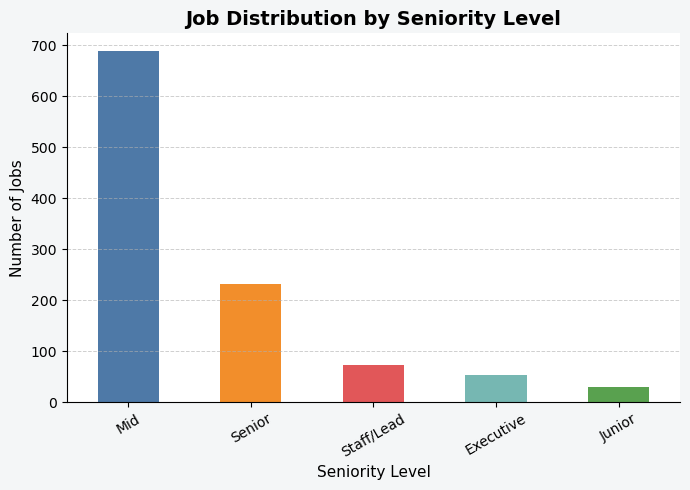

In [93]:
seniority_counts = df_viz['seniority'].value_counts()




bar_colors = [
    "#4e79a7",  # blue
    "#f28e2b",  # orange
    "#e15759",  # red
    "#76b7b2",  # teal
    "#59a14f"   # green (extra safety)
][:len(seniority_counts)]



fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('#f4f6f7')   # outer background
ax.set_facecolor('#ffffff')          # plot background



seniority_counts.plot(
    kind='bar',
    color=bar_colors,
    ax=ax
)



ax.set_title("Job Distribution by Seniority Level", fontsize=14, fontweight='bold')
ax.set_xlabel("Seniority Level", fontsize=11)
ax.set_ylabel("Number of Jobs", fontsize=11)



ax.set_xticklabels(ax.get_xticklabels(), rotation=30)



ax.grid(
    axis='y',
    linestyle='--',
    linewidth=0.7,
    alpha=0.6
)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(f"seniority_distribution.png", dpi=300)
plt.show()
plt.close()

# Hiring Companies

* Top 10

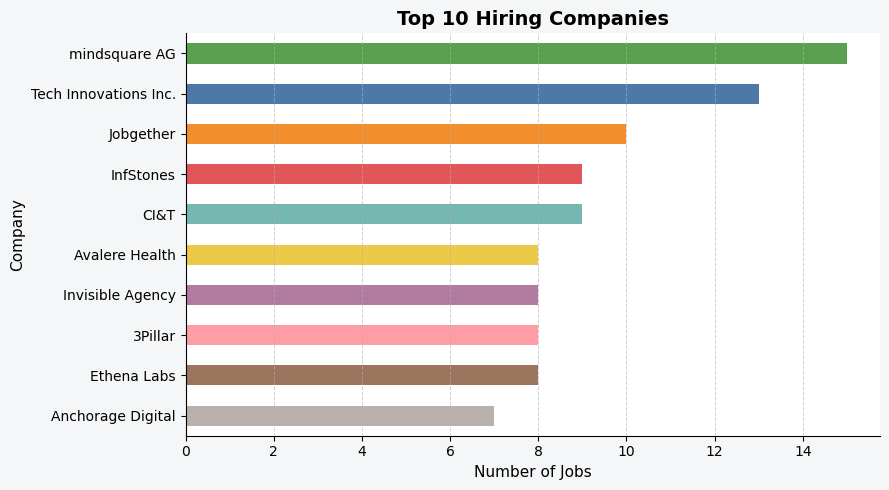

In [94]:
top_companies = df_viz['company_name'].value_counts().head(10)



bar_colors = [
    "#59a14f", "#4e79a7", "#f28e2b", "#e15759", "#76b7b2",
    "#edc948", "#b07aa1", "#ff9da7", "#9c755f", "#bab0ab"
]



fig, ax = plt.subplots(figsize=(9, 5))
fig.patch.set_facecolor('#f4f6f7')   # outer background
ax.set_facecolor('#ffffff')          # plot background



top_companies.plot(
    kind='barh',
    color=bar_colors,
    ax=ax
)



ax.set_title("Top 10 Hiring Companies", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Jobs", fontsize=11)
ax.set_ylabel("Company", fontsize=11)



ax.grid(
    axis='x',
    linestyle='--',
    linewidth=0.7,
    alpha=0.6
)




ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.invert_yaxis()

plt.tight_layout()
plt.savefig(f"top_10_hiring_companies.png", dpi=300)
plt.show()
plt.close()

* Top 20

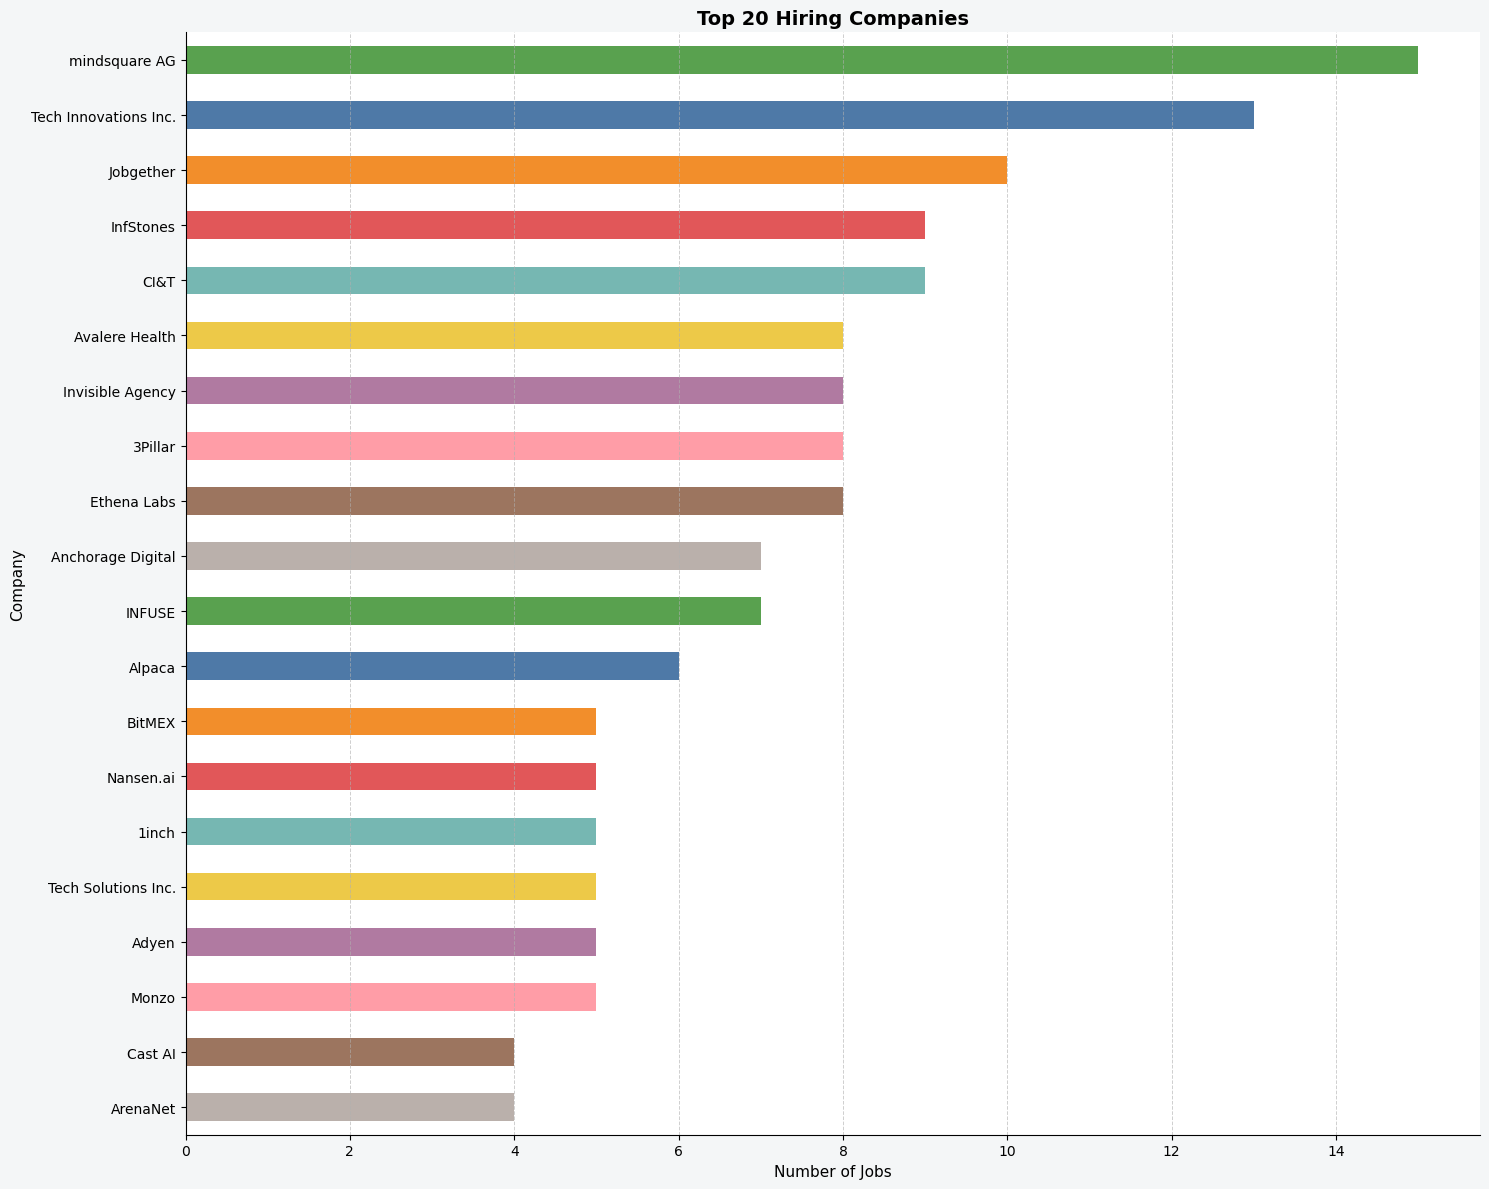

In [95]:
top_companies = df_viz['company_name'].value_counts().head(20)



bar_colors = [
    "#59a14f", "#4e79a7", "#f28e2b", "#e15759", "#76b7b2",
    "#edc948", "#b07aa1", "#ff9da7", "#9c755f", "#bab0ab"
]



fig, ax = plt.subplots(figsize=(15, 12))
fig.patch.set_facecolor('#f4f6f7')   # outer background
ax.set_facecolor('#ffffff')          # plot background



top_companies.plot(
    kind='barh',
    color=bar_colors,
    ax=ax
)



ax.set_title("Top 20 Hiring Companies", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Jobs", fontsize=11)
ax.set_ylabel("Company", fontsize=11)



ax.grid(
    axis='x',
    linestyle='--',
    linewidth=0.7,
    alpha=0.6
)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



ax.invert_yaxis()

plt.tight_layout()
plt.savefig(f"top_20_hiring_companies.png", dpi=300)
plt.show()
plt.close()

# Job Postings Trends

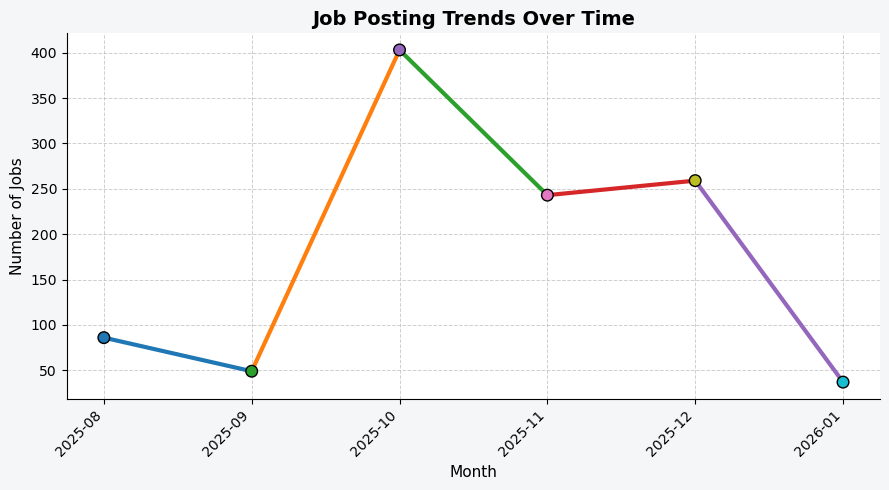

In [96]:
df_viz['post_date'] = pd.to_datetime(
    df_viz['post_date'], errors='coerce'
)




job_trends = (
    df_viz
    .groupby(df_viz['post_date'].dt.to_period('M'))
    .size()
)



x = np.arange(len(job_trends))
y = job_trends.values



fig, ax = plt.subplots(figsize=(9, 5))
fig.patch.set_facecolor('#f4f6f7')   # outer background
ax.set_facecolor('#ffffff')          # plot background



for i in range(len(x) - 1):
    ax.plot(
        x[i:i+2],
        y[i:i+2],
        color=plt.cm.tab10(i % 10),
        linewidth=3
    )



ax.scatter(
    x,
    y,
    c=x,
    cmap='tab10',
    s=70,
    edgecolors='black',
    zorder=3
)



ax.set_title("Job Posting Trends Over Time", fontsize=14, fontweight='bold')
ax.set_xlabel("Month", fontsize=11)
ax.set_ylabel("Number of Jobs", fontsize=11)



ax.set_xticks(x)
ax.set_xticklabels(job_trends.index.astype(str), rotation=45, ha='right')



ax.grid(
    True,
    linestyle='--',
    linewidth=0.7,
    alpha=0.6
)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(f"job_trends.png", dpi=300)
plt.show()
plt.close()

# Skill Frequency Comparison Visualization

In [97]:
# Prepare skills data for visualization

df_viz['technical_skills'] = df['technical_skills'].str.split(',')
skills_exploded = df.explode('technical_skills')
skills_exploded['technical_skills'] = skills_exploded['technical_skills'].str.strip()

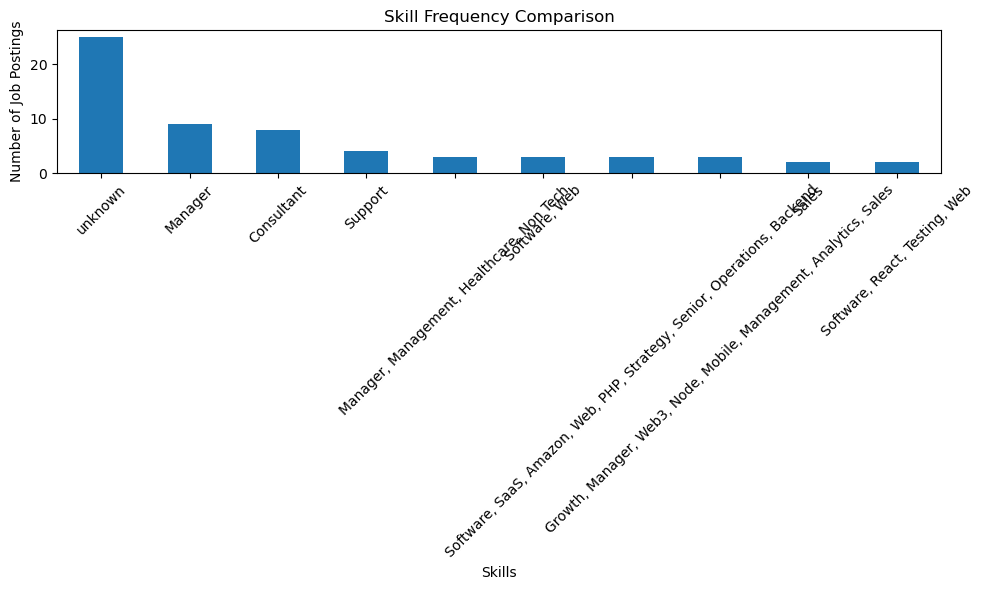

In [98]:


skill_frequency = skills_exploded['technical_skills'].value_counts().head(10)

plt.figure(figsize=(10, 6))
skill_frequency.plot(kind='bar')
plt.title("Skill Frequency Comparison")
plt.xlabel("Skills")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("skill_frequency_comparison.png")
plt.show()